In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


In [3]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

svm_classifier = SVC(kernel='linear')  
y_pred = cross_val_predict(svm_classifier, X, y, cv=kf)


Accuracy =  87.8645343367827 %
Precision =  0.7799271960887312
Recall =  0.7447691622559768
F1-score =  0.759700062905222


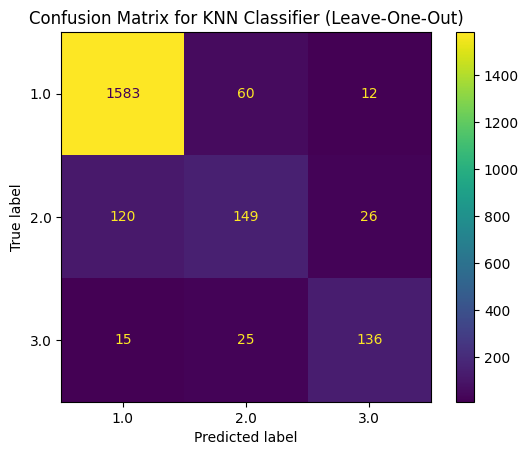

In [4]:



print("Accuracy = ", accuracy_score(y, y_pred) * 100, "%")
print("Precision = ", precision_score(y, y_pred,average='macro'))
print("Recall = ", recall_score(y, y_pred,average='macro'))
print("F1-score = ", f1_score(y, y_pred,average='macro'))

confusion = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for KNN Classifier (Leave-One-Out)')
plt.show()

In [5]:
from sklearn.metrics import classification_report
report = classification_report(y, y_pred)
print(report)


              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94      1655
         2.0       0.64      0.51      0.56       295
         3.0       0.78      0.77      0.78       176

    accuracy                           0.88      2126
   macro avg       0.78      0.74      0.76      2126
weighted avg       0.87      0.88      0.87      2126



In [6]:

result = permutation_importance(svm_classifier, X, y, n_repeats=10, random_state=42)

# Get the importances and standard deviations
importances = result.importances_mean
std = result.importances_std

# Normalize the importances
importances /= np.sum(importances)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(importances) + 1), importances, yerr=std, align="center")
plt.title("Permutation Importances in SVM")
plt.xlabel("Features")
plt.ylabel("Normalized Importance")
plt.xticks(range(1, len(importances) + 1))
plt.show()


NameError: name 'permutation_importance' is not defined

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()